## Dataset: Cardio Good Fitness (Data Visualization)

## Table of Contents
#### 1. [Background](#part1)
#### 2. [Problem Statement](#part2)
#### 3. [Project Objectives](#part3)
#### 4. [Primary business/research questions](#part4)
#### 5. [Metadata](#part5) 
#### 6. [Importing Data with Pandas](#part6)  
   - [6.1 Cardio Good Fitness DataFrame](#part6.1) 
   
#### 7. [Data Preprocessing](#part7)
   - [7.1 Identifying Missing Values](#part7.1)
   - [7.2 Checking Categorical Variables](#part7.2)
   - [7.3 Checking Datatype](#part7.3)
   
#### 8. [Data Exploration and Visualization](#part8)
   - [8.1 Descriptive Statistics](#part8.1)
   - [8.2 Correlation](#part8.2)
   - [8.3 Univariate Analysis](#part8.3)
   - [8.4 Summary of Univariate Analysis - Categorical Variables](#part8.4) 
   - [8.5 Summary of Univariate Analysis - Numerical/Continuous Variables](#part8.5)
   - [8.6 Bivariate Analysis](#part8.6) 
       - [8.6.1 Customer's demographics segmentation](#part8.6.1)
       - [8.6.2 Customer's income and education segmentation](#part8.6.2) 
       - [8.6.3 Customer's behavioural segmentation](#part8.6.3)
   - [8.7 Multivariate Analysis](#part8.7) 
       - [8.7.1 General Overview](#part8.7.1)
       - [8.7.2 Customer's demographics segmentation](#part8.7.2)
       - [8.7.3 Customer's income and education segmentation](#part8.7.3) 
       - [8.7.4 Customer's behavioural segmentation](#part8.7.4)  
   - [8.8 Multivariate Analysis across different customer segmentations](#part8.8) 
       - [8.8.1 Customer's income, education and behavioural segmentation](#part8.8.1)       
 
#### 9. [Dashboards](#part9)
   - [9.1 Dashboard 1: Product characterization](#part9.1)
   - [9.2 Dashboard 2: Customer's demographics segmentation](#part9.2)
   - [9.3 Dashboard 3: Customer's income and education segmentation](#part9.3)
   - [9.4 Dashboard 4: Customer's behavioural segmentation](#part9.4) 
   
#### 10. [Conclusion (Actionable Insights)](#part10)

## Background <a id="part1"></a>

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. 

The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. 

The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.


### Source & Acknowledgements

The CardioGoodFitness.csv file is downloaded from Kaggle (https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness)

## Problem Statement <a id="part2"></a>

How to implement personalized/targeted product sales for each customer segment

## Project Objectives <a id="part3"></a>

The objective of this project is to provide the marketing management with valuable and actionable insights on how to implement personalized/targeted product sales by customer segmentation. 

This is done by gathering and presenting these data in the form of visualizations and dashboards

## Primary business/research questions <a id="part4"></a>

1. Product characterization

    •	Which is the best-selling treadmill model?
    
    •	Is there any correlation between the different customer characteristics that can be grouped together? 


2. Customer’s demographics segmentation 

    •	How does the preference for each product change with age, gender and marital status?


3. Customer's income and education segmentation

    •	How does the preference for each product change with income level and education qualifications?
    

4. Customer’s behavioral segmentation

    •	How does the preference for each product change with customer’s fitness, intended usage and intended miles coverage?


## Metadata <a id="part5"></a>

1. Product: Model of treadmill purchased (TM195, TM498, or TM798)

2. Age: Age of customer in years (integer values)

3. Gender: Gender of customer (Male or Female)

4. Education: Number of years of education customer had completed (integer values)

5. MaritalStatus: Marital status of customer (Single or Partnered)

6. Usage: Average number of times the customer plans to use the treadmill each week (integer values)

7. Fitness: Customer’s self-rated fitness on a 1-to-5 scale (1: very unfit; 5: very fit)

8. Income: Customer’s annual household income (integer values)

9. Miles: Average number of miles the customer expects to walk/run each week (integer values)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

## Importing Data with Pandas<a id="part6"></a>


### Cardio Good Fitness Dataframe<a id="part6.1"></a>

#### Read in CardioGoodFitness.csv file. Dataframe has 180 rows and 9 columns/attributes

In [2]:
# Read the csv file using pd.read_csv() function
df = pd.read_csv('CardioGoodFitness.csv')

# Create a copy of the dataframe
df_bkup = df.copy()

# display the Dataframe
df
# notice that there are 'na' values which need to be dealt with separately as Pandas do not recognise these as null values

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
# Basic summary of the dataset

print(df.shape) # 180 rows, 9 columns
print(df.size) # 1620 observations in total
print(df.dtypes)

(180, 9)
1620
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


## Data Preprocessing<a id="part7"></a>

### Identifying Missing Values <a id="part7.1"></a>

In [4]:
# check for any null values in each column.
# 'Age' and 'Usage' columns have 3 and 8 null values respecitively
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Checking Categorical Variables <a id="part7.2"></a>

In [5]:
# check for number of unique fields in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Checking Datatype <a id="part7.3"></a>

In [6]:
# check data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Data Exploration and Visualization <a id="part8"></a>

###  Descriptive statistics <a id="part8.1"></a>

In [7]:
# Use descriptive statistics to check if there are anything amiss in each column. No discrepancies in values noted 
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


###  Correlation <a id="part8.2"></a>

#### Miles, usage and fitness are highly correlated to each other. Education and Income are highly correlated to each other

<Axes: title={'center': 'Correlation of features in Cardio Good Fitness Dataset'}>

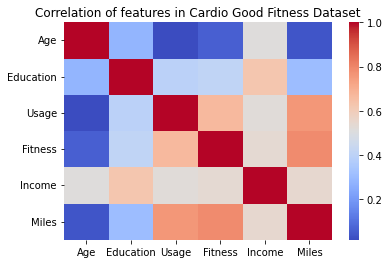

In [8]:
# Use correlation to check if there are features that are highly correlated to each other
plt.title("Correlation of features in Cardio Good Fitness Dataset") # title name
sns.heatmap(df.corr(), cmap = 'coolwarm') # generate a heatmap using sns.heatmap(df.corr(), cmap = 'coolwarm')

### Univariate analysis <a id="part8.3"></a>

#### Perform univariate analysis on 'Product' column. Note that 44.44% of customers (80 counts) bought TM195, 33.33% of customers (60 counts) bought TM498 and 22.22% of customers (40 counts) bought TM798

In [9]:
# Group dataset by Product and count the number of products sold in each unique fields
products = df.groupby(['Product'])["Product"].count()
products

Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

([<matplotlib.patches.Wedge at 0x1f4ae872100>,
 [Text(0.20837780090640246, 1.1817693057823986, 'TM195'),
  Text(-0.8426488506529132, -0.7070664144854603, 'TM498'),
  Text(0.8426489499534077, -0.7070662961437348, 'TM798')],
 [Text(0.12155371719540142, 0.6893654283730657, '44.44%'),
  Text(-0.4596266458106798, -0.38567258971934193, '33.33%'),
  Text(0.45962669997458594, -0.3856725251693099, '22.22%')])

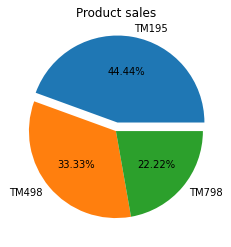

In [10]:
# Create Pie Chart
plt.title('Product sales') # title name
plt.pie(products, explode=(0.1,0,0), labels=products.index, autopct='%1.2f%%') # use plt.pie() to generate a pie chart
# Customers purchase more TM195 than the rest, followed by TM498, then TM798

#### Perform univariate analysis on 'Age' column. Customers' age distribution is from 18 to 50. Most of the customers who purchase the products are about 26 years old

Text(0.5, 1.0, 'Age distribution')

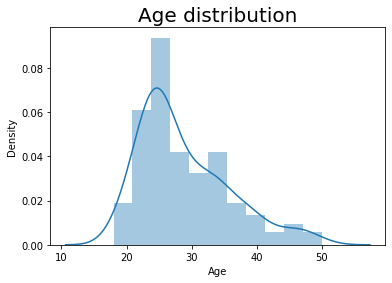

In [11]:
# use sns.distplot() to check the distribution of the age column
sns.distplot(df['Age']).set_title('Age distribution', fontsize = 20)
# Most of the customers who purchase the products are about 26 years old

#### Perform univariate analysis on 'Gender' column. Note that 57.78% of customers (104 counts) who bought the products are male, 42.22% of customers (76 counts) are female

In [12]:
# Group dataset by Gender and count the number of products sold in each unique fields
genders = df.groupby(['Gender'])["Product"].count()
genders

Gender
Female     76
Male      104
Name: Product, dtype: int64

([<matplotlib.patches.Wedge at 0x1f4b1940b80>,
 [Text(0.2661140696149358, 1.0673253027793248, 'Female'),
  Text(-0.2903061487469757, -1.1643549029396918, 'Male')],
 [Text(0.14515312888087403, 0.5821774378796316, '42.22%'),
  Text(-0.1693452534357358, -0.6792070267148201, '57.78%')])

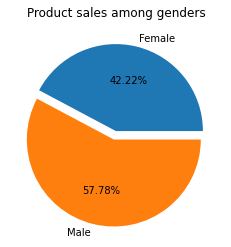

In [13]:
# Create Pie Chart
plt.title('Product sales among genders') # title name
plt.pie(genders, explode=(0,0.1), labels=genders.index, autopct='%1.2f%%') # use plt.pie() to generate a pie chart
# Male customers purchase more products than female customers

#### Perform univariate analysis on 'Education' column. The customer’s education distribution ranges from 12 to 21 years. Most of the customers who bought the products have about 16 years of education

Text(0.5, 1.0, 'Education distribution')

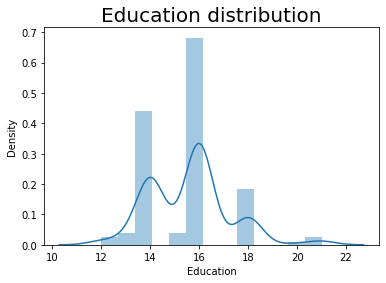

In [14]:
# use sns.distplot() to check the distribution of the Education column
sns.distplot(df['Education']).set_title('Education distribution', fontsize = 20)
# 16 years of education the highest buyers

#### Perform univariate analysis on 'MaritalStatus' column. 59.44% of the customers (107 counts) who bought the products are partnered, 40.56% of the customers (73 counts) are single

In [15]:
# Group dataset by Marital Status and count the number of products sold in each unique fields
status = df.groupby(['MaritalStatus'])["Product"].count()
status

MaritalStatus
Partnered    107
Single        73
Name: Product, dtype: int64

([<matplotlib.patches.Wedge at 0x1f4b1a31730>,
 [Text(-0.3216089058361209, 1.0519352221914111, 'Partnered'),
  Text(0.35084607909395044, -1.1475656969360846, 'Single')],
 [Text(-0.175423039546975, 0.5737828484680423, '59.44%'),
  Text(0.20466021280480443, -0.669413323212716, '40.56%')])

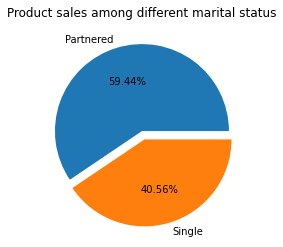

In [16]:
# Create Pie Chart
plt.title('Product sales among different marital status')
plt.pie(status, explode=(0,0.1), labels=status.index, autopct='%1.2f%%')
# Partnered customers purchase more products than single customers

#### Perform univariate analysis on 'Usage' column. The customer’s usage distribution is from 2 to 7 times per week. Most of the customers who bought the products intend to use it 3 times per week

Text(0.5, 1.0, 'Usage distribution')

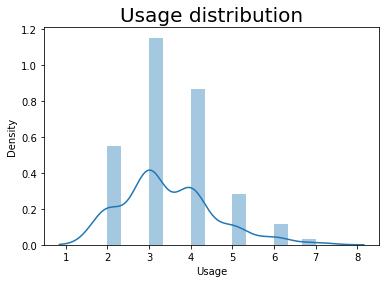

In [17]:
# use sns.distplot() to check the distribution of the Usage column
sns.distplot(df['Usage']).set_title('Usage distribution', fontsize = 20)
# usage 3 is the highest

#### Perform univariate analysis on 'Fitness' column. The customer’s fitness distribution ranges from 1 (very unfit) to 5 (very fit). Most of the customers who bought the products rated themselves to be 3 (fit).

Text(0.5, 1.0, 'Fitness distribution')

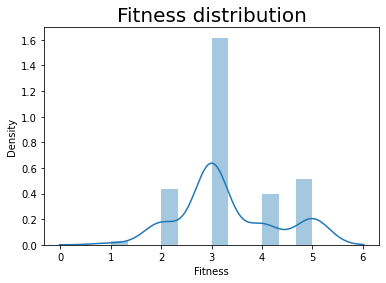

In [18]:
# use sns.distplot() to check the distribution of the Fitness column
sns.distplot(df['Fitness']).set_title('Fitness distribution', fontsize = 20)
# Fitness 3 is the highest

#### Perform univariate analysis on 'Income' column. Most of the customers who bought the products have an annual household income of about $50,596.50

Text(0.5, 1.0, 'Income distribution')

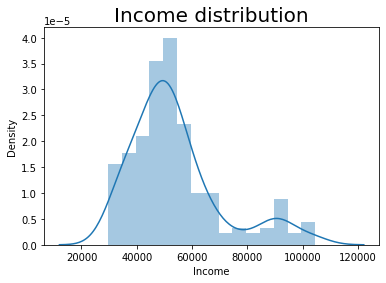

In [19]:
# use sns.distplot() to check the distribution of the Income column
sns.distplot(df['Income']).set_title('Income distribution', fontsize = 20)
# Income distribution is from 29,562 to 104,581

#### Perform univariate analysis on 'Miles' column. Most of the customers who bought the products expects to run/walk about 94 miles per week

Text(0.5, 1.0, 'Miles distribution')

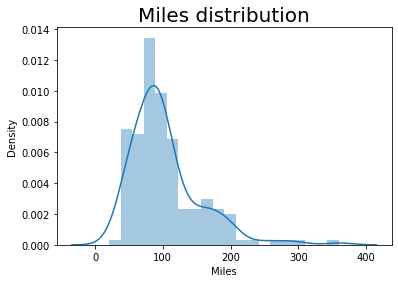

In [20]:
# use sns.distplot() to check the distribution of the Miles column
sns.distplot(df['Miles']).set_title('Miles distribution', fontsize = 20)
# Miles distribution is from 21 to 360

### Summary of univariate analysis - Categorical variables <a id="part8.4"></a>

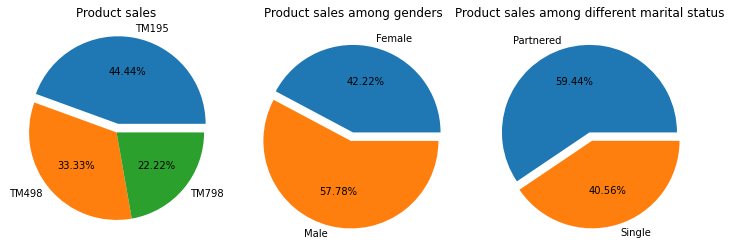

In [21]:
# Create a 1 x 3 Pie Charts using plt.subplots()

fig, ax = plt.subplots(1,3, figsize=(10, 6))

ax[0].pie(products, explode=(0.1,0,0), labels=products.index, autopct='%1.2f%%')
ax[0].set_title('Product sales')
ax[1].pie(genders, explode=(0,0.1), labels=genders.index, autopct='%1.2f%%')
ax[1].set_title('Product sales among genders')
ax[2].pie(status, explode=(0,0.1), labels=status.index, autopct='%1.2f%%')
ax[2].set_title('Product sales among different marital status')
plt.tight_layout()

### Summary of univariate analysis - Numerical/continuous variables <a id="part8.5"></a>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


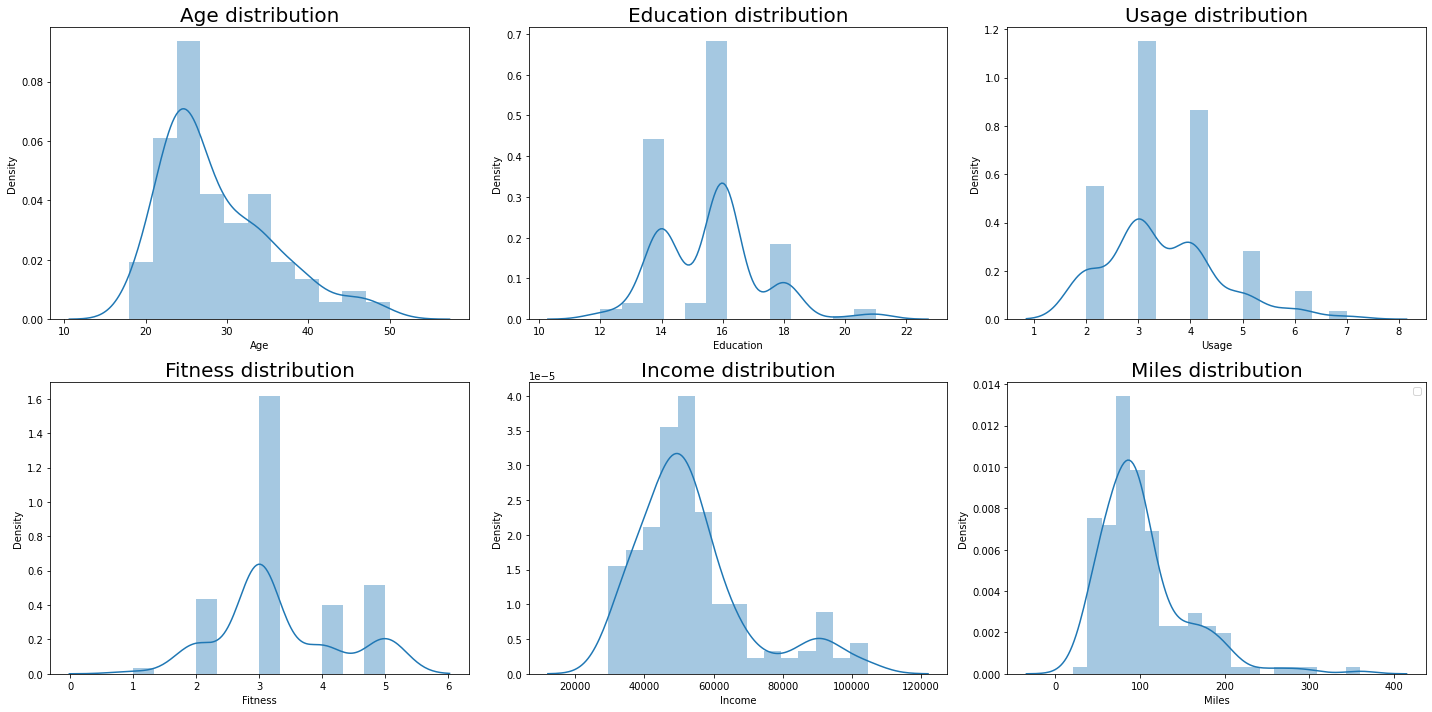

In [22]:
# Create a 2 x 3 displots using plt.subplots()

fig, ax = plt.subplots(2,3, figsize=(20, 10))
sns.distplot(df['Age'], ax=ax[0,0]).set_title('Age distribution', fontsize = 20)
sns.distplot(df['Education'], ax=ax[0,1]).set_title('Education distribution', fontsize = 20)
sns.distplot(df['Usage'], ax=ax[0,2]).set_title('Usage distribution', fontsize = 20)
sns.distplot(df['Fitness'], ax=ax[1,0]).set_title('Fitness distribution', fontsize = 20)
sns.distplot(df['Income'], ax=ax[1,1]).set_title('Income distribution', fontsize = 20)
sns.distplot(df['Miles'], ax=ax[1,2]).set_title('Miles distribution', fontsize = 20)
plt.tight_layout()
plt.legend()

### Bivariate analysis <a id="part8.6"></a>

### (i) Customer’s demographics segmentation  <a id="part8.6.1"></a>
    •	How does the preference for each product change with age, gender and marital status?

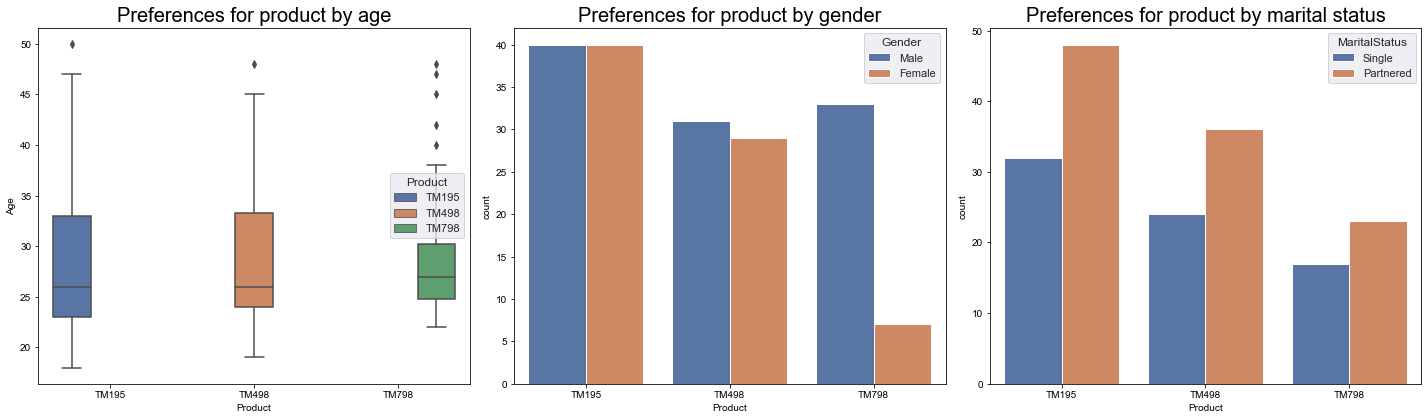

In [23]:
# Create a 1 by 3 boxplots and bar charts using plt.subplots()
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.set(font_scale = 1)
sns.boxplot(y='Age', x='Product', hue='Product', data=df, ax=ax[0]).set_title('Preferences for product by age', fontsize = 20)
sns.countplot(x='Product', hue='Gender', data=df, ax=ax[1]).set_title('Preferences for product by gender', fontsize = 20)
sns.countplot(x='Product', hue='MaritalStatus', data=df, ax=ax[2]).set_title('Preferences for product by marital status', fontsize = 20)
plt.tight_layout()

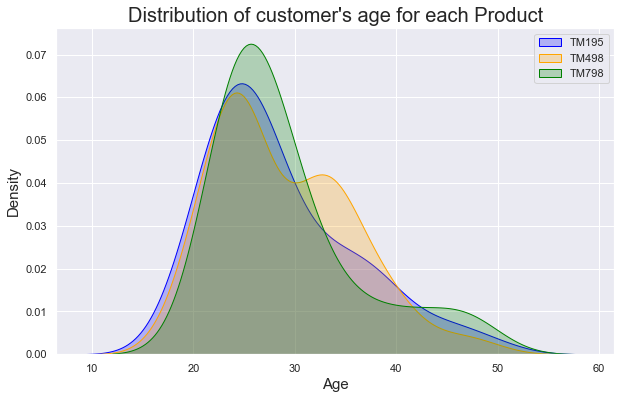

In [24]:
# Create a histogram plots using plt.subplots()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
a1 = df[df['Product']=='TM195'].Age
a2 = df[df['Product']=='TM498'].Age
a3 = df[df['Product']=='TM798'].Age
ax = sns.distplot(a1, label = 'TM195', color = 'blue', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(a2, label = 'TM498', color = 'orange', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(a3, label = 'TM798', color = 'green', hist = None, kde_kws = {'shade':True})

# set plot title and labels
ax.set_xlabel('Age',fontsize =15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title("Distribution of customer's age for each Product", fontsize = 20)
 
# set legend
ax.legend()

### (ii) Customer’s income and education segmentation <a id="part8.6.2"></a>
    •	How does the preference for each product change with income and education?

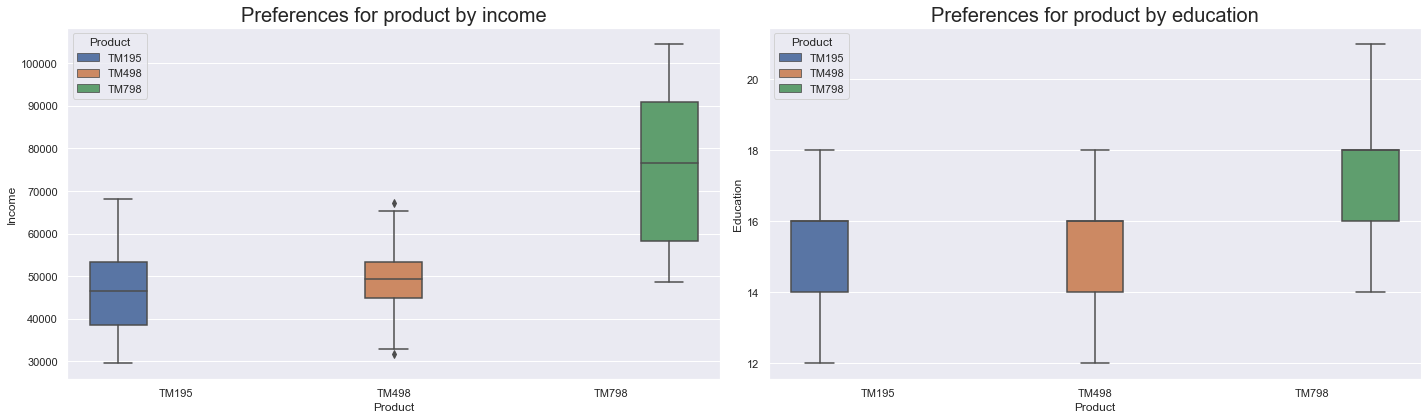

In [25]:
# Create a 1 by 2 boxplots using plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.set(font_scale = 1)
sns.boxplot(y='Income', x='Product', hue='Product', data=df, ax=ax[0]).set_title("Preferences for product by income", fontsize = 20)
sns.boxplot(y='Education', x='Product', hue='Product', data=df, ax=ax[1]).set_title("Preferences for product by education", fontsize = 20)
plt.tight_layout()

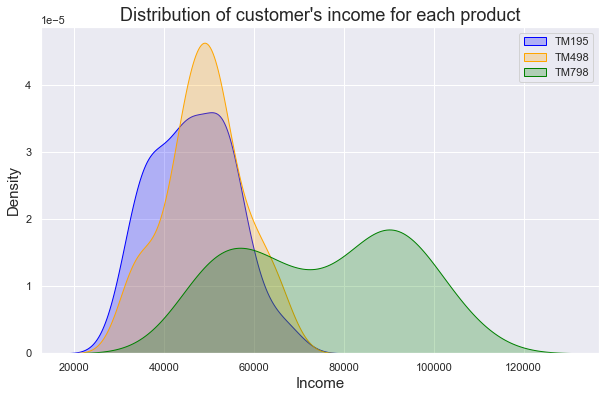

In [26]:
# Create a histogram plots using plt.subplots()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
i1 = df[df['Product']=='TM195'].Income
i2 = df[df['Product']=='TM498'].Income
i3 = df[df['Product']=='TM798'].Income
ax = sns.distplot(i1, label = 'TM195', color = 'blue', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(i2, label = 'TM498', color = 'orange', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(i3, label = 'TM798', color = 'green', hist = None, kde_kws = {'shade':True})

# set plot title and labels
ax.set_xlabel('Income',fontsize =15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title("Distribution of customer's income for each product", fontsize = 18)

# set legend
ax.legend()

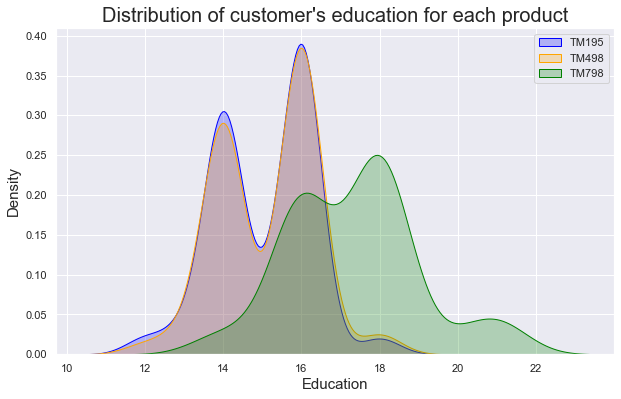

In [27]:
# Create a histogram plots using plt.subplots()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
e1 = df[df['Product']=='TM195'].Education
e2 = df[df['Product']=='TM498'].Education
e3 = df[df['Product']=='TM798'].Education
ax = sns.distplot(e1, label = 'TM195', color = 'blue', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(e2, label = 'TM498', color = 'orange', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(e3, label = 'TM798', color = 'green', hist = None, kde_kws = {'shade':True})

# set plot title and labels
ax.set_xlabel('Education',fontsize =15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title("Distribution of customer's education for each product", fontsize = 20)

# set legend
ax.legend()

### (iii) Customer’s behavioural segmentation <a id="part8.6.3"></a>
    •	How does the preference for each product change with customer’s fitness, intended usage and intensity?

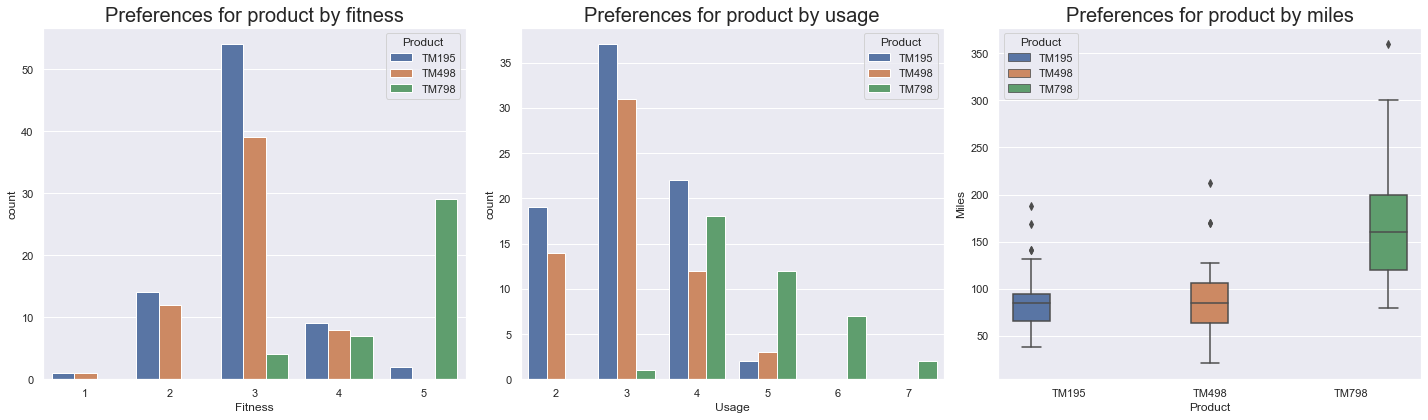

In [28]:
# Create a bar charts and boxplots using plt.subplots()
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.set(font_scale = 1)
sns.countplot(x='Fitness', hue='Product', data=df, ax=ax[0]).set_title("Preferences for product by fitness", fontsize = 20)
sns.countplot(x='Usage', hue='Product', data=df, ax=ax[1]).set_title("Preferences for product by usage", fontsize = 20)
sns.boxplot(y='Miles', x='Product', hue='Product', data=df, ax=ax[2]).set_title("Preferences for product by miles", fontsize = 20)
plt.tight_layout()

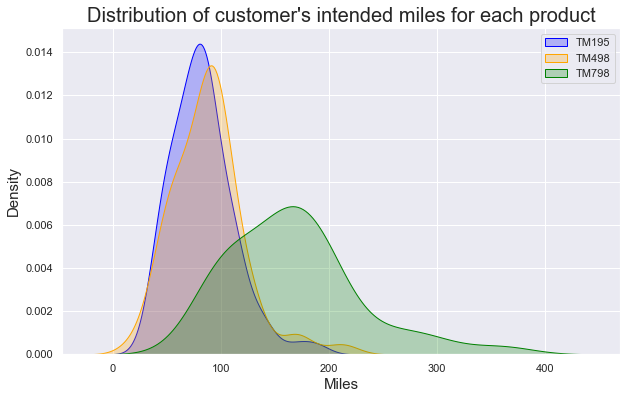

In [29]:
# Create a histogram plots using plt.subplots()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
m1 = df[df['Product']=='TM195'].Miles
m2 = df[df['Product']=='TM498'].Miles
m3 = df[df['Product']=='TM798'].Miles
ax = sns.distplot(m1, label = 'TM195', color = 'blue', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(m2, label = 'TM498', color = 'orange', hist = None, kde_kws = {'shade':True})
ax = sns.distplot(m3, label = 'TM798', color = 'green', hist = None, kde_kws = {'shade':True})

# set plot title and labels
ax.set_xlabel('Miles',fontsize =15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title("Distribution of customer's intended miles for each product", fontsize = 20)

# set legend
ax.legend()

### Multivariate analysis <a id="part8.7"></a>

### (i) General overview <a id="part8.7.1"></a>
    •	How does the preference for each product change with most of the features?

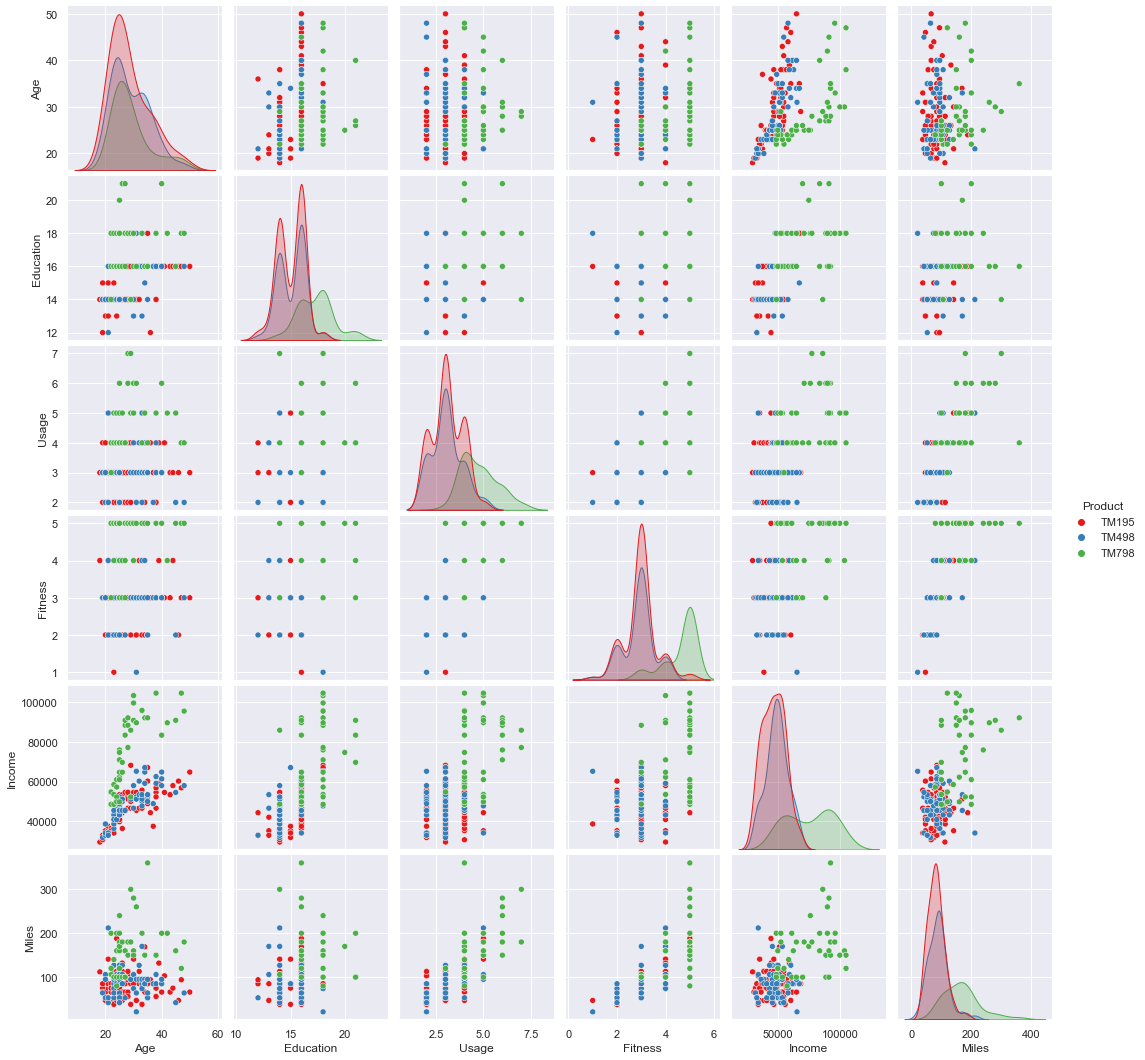

In [30]:
# use sns.pairplot() to visualize the comparison of products with most of the features 

sns.pairplot(df, hue="Product", palette="Set1", diag_kind="kde", height=2.5)

### (ii) Customer’s demographics segmentation <a id="part8.7.2"></a>
    •	How does the preference for each product change with gender vs. marital status?

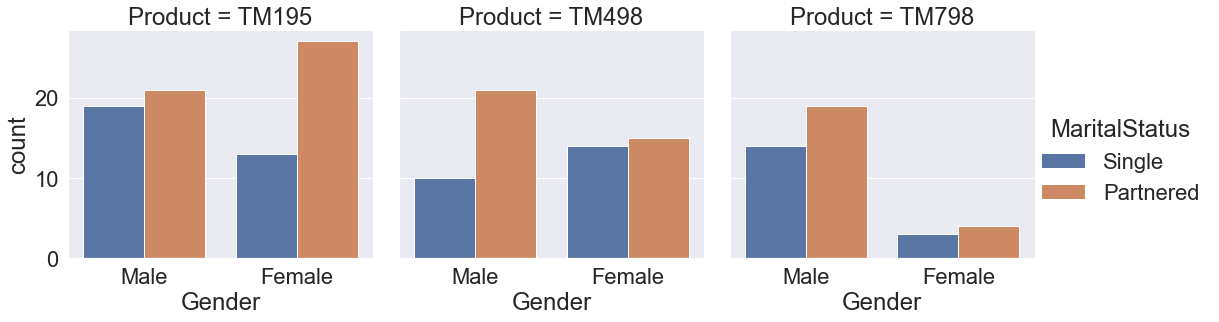

In [31]:
# Create a bar charts by using sns.catplot() to compare gender vs. marital status vs. product

sns.set(font_scale = 2)
a3 = sns.catplot(
    x='Gender',
    hue='MaritalStatus',
    col='Product',
    data=df,
    kind='count',
    ci=None,
)

### (iii) Customer’s income and education segmentation <a id="part8.7.3"></a>
    •	How does the preference for each product change with income vs. education?

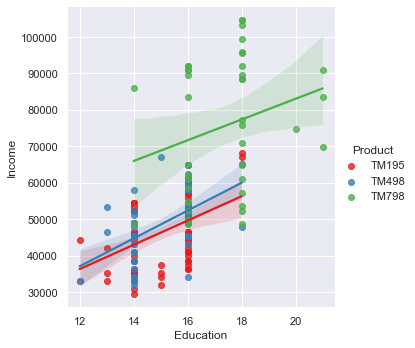

In [32]:
# Create a scatterplots by using sns.lmplot() to compare income vs. education distributions vs. product

sns.set(font_scale = 1)
h= sns.lmplot(
    x='Education',
    y='Income',
    data=df,
    hue='Product',  
    palette='Set1',    
)

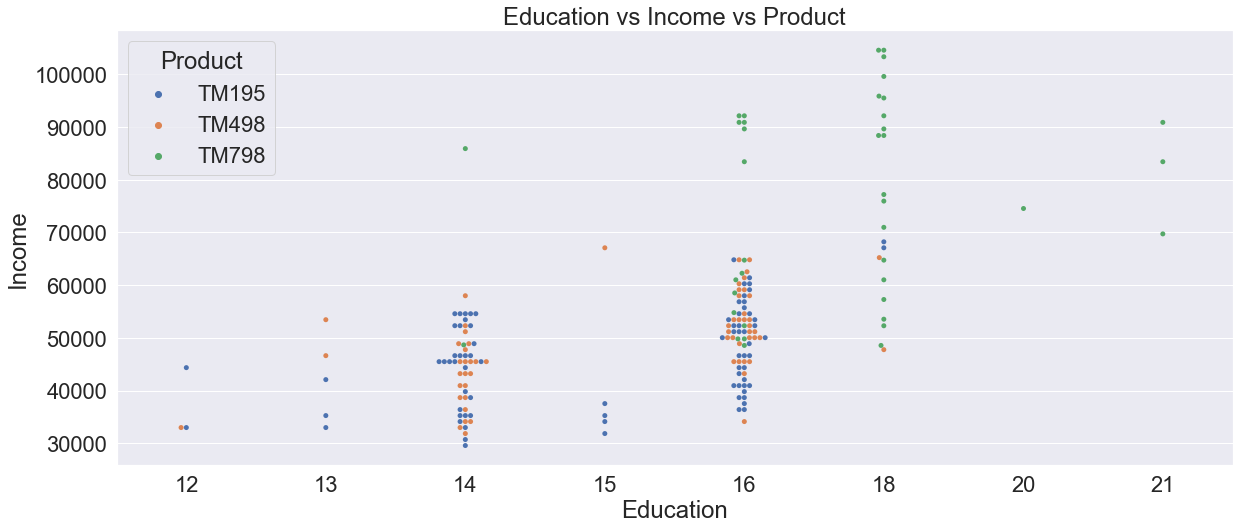

In [33]:
# Create a swarmplot by using sns.swarmplot() to compare income vs. education distributions vs. product

sns.set(font_scale = 2)
plt.figure(figsize=(20, 8))
plt.title("Education vs Income vs Product")
i = sns.swarmplot(
    x=df['Education'],
    y=df['Income'],
    hue=df['Product'],
)

### (iv) Customer’s behavioural segmentation <a id="part8.7.4"></a>
    •	How does the preference for each product change with customer’s fitness vs. intended usage, customer's fitness vs. intended usage intensity and customer's usage vs. intended usage intensity?

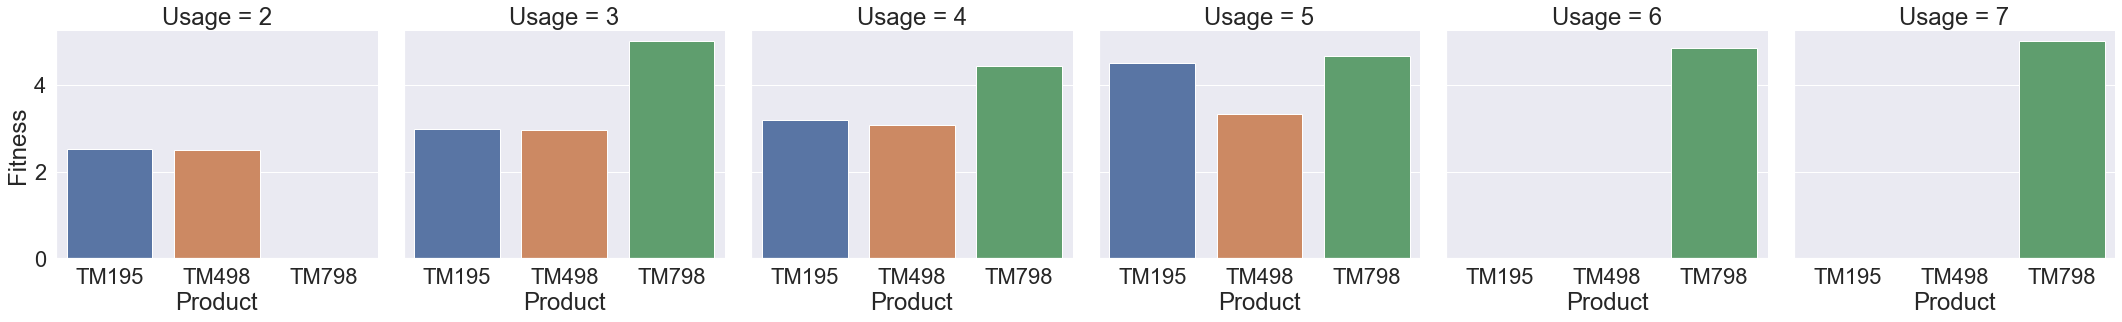

In [34]:
# Create a bar charts by using sns.catplot() to compare fitness, usage vs. product

sns.set(font_scale = 2)
b1 = sns.catplot(
    x='Product',
    y='Fitness',
    col='Usage',
    data=df,
    kind='bar',
    ci=None,
)

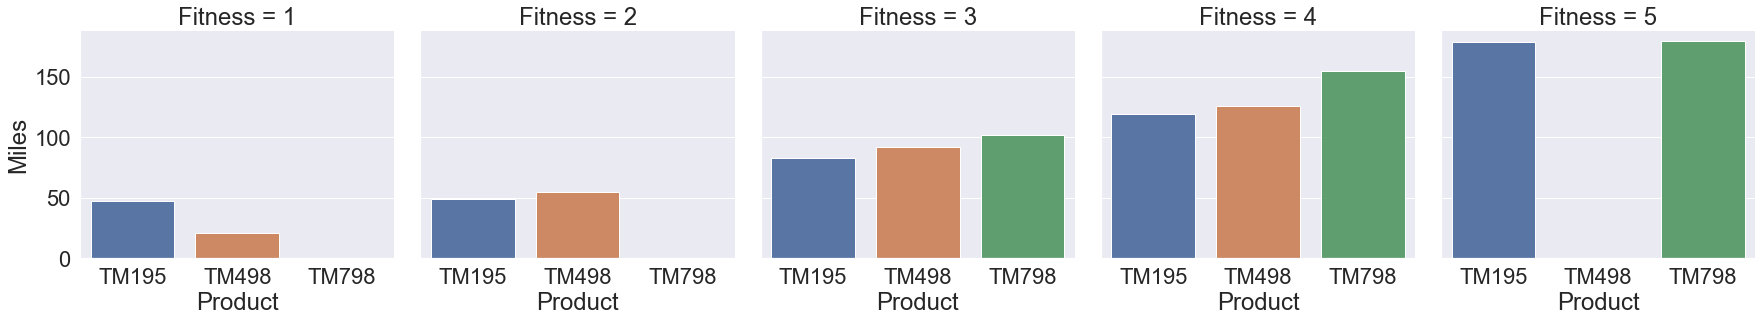

In [35]:
# Create a bar charts by using sns.catplot() to compare fitness vs. miles distribution vs. product

sns.set(font_scale = 2)
b2 = sns.catplot(
    x='Product',
    y='Miles',
    col='Fitness',
    data=df,
    kind='bar',
    ci=None,
)

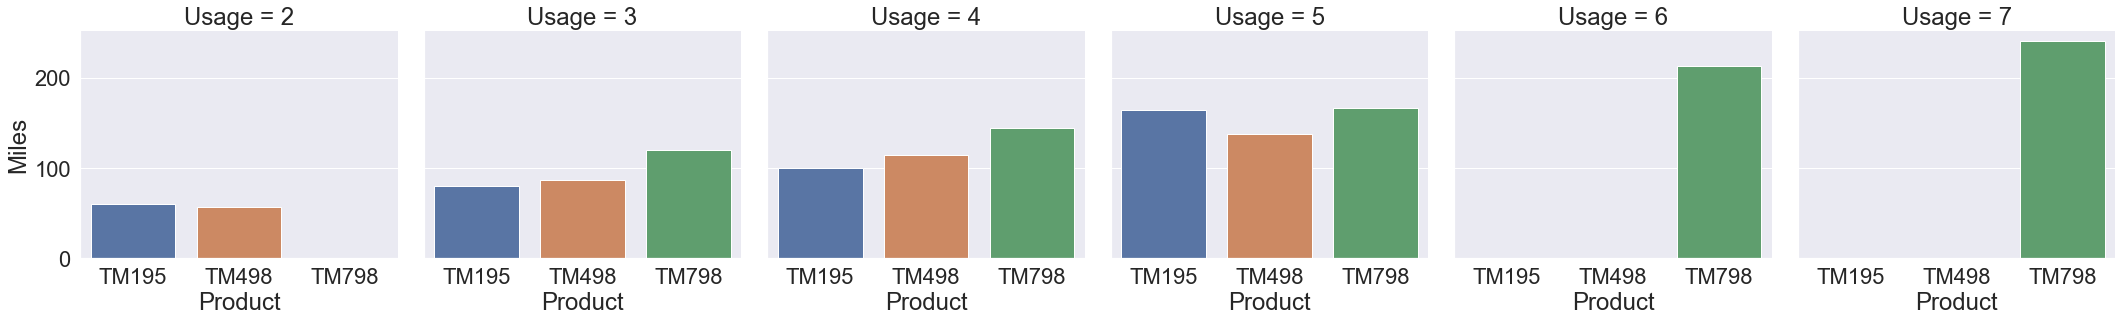

In [36]:
# Create a bar charts by using sns.catplot() to compare usage vs. miles distribution vs. product

sns.set(font_scale = 2)
b3 = sns.catplot(
    x='Product',
    y='Miles',
    col='Usage',
    data=df,
    kind='bar',
    ci=None,
)

## Multivariate analysis across different customer's segmentations <a id="part8.8"></a>

### (i) Customer’s income, education and behavioural segmentation <a id="part8.8.1"></a>
    •	How does the preference for each product change with customer’s income, education vs. intended usage intensity?

### Customer's Miles vs. Income vs. Product 

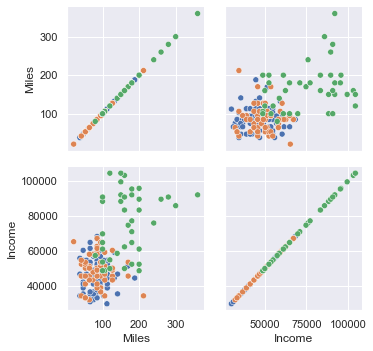

In [37]:
# Create a scatterplots using sns.scatterplot with sns.PairGrid to compare miles vs. income vs. product 

sns.set(font_scale = 1)
g = sns.PairGrid(df, vars=["Miles", "Income"], hue="Product")
g.map(sns.scatterplot)

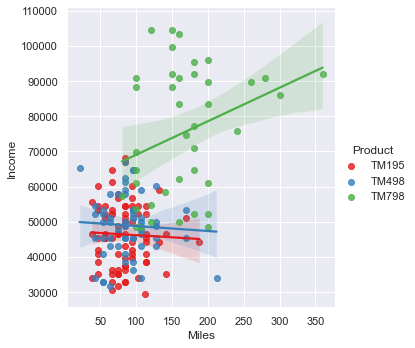

In [38]:
# Create a scatterplots with regression line using sns.lmplot to compare miles vs. income vs. product 

sns.set(font_scale = 1)
j = sns.lmplot(
    x='Miles',
    y='Income',
    data=df,
    hue='Product',  
    palette='Set1',    
)

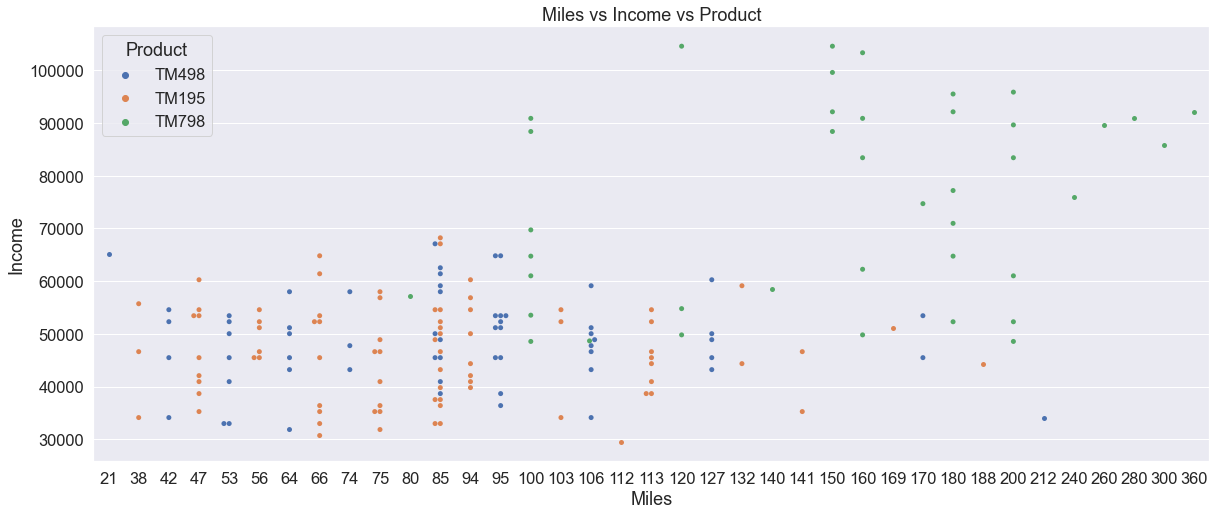

In [39]:
# Create a swarmplot using sns.swarmplot to compare miles vs. income vs. product 

sns.set(font_scale = 1.5)
plt.figure(figsize=(20, 8))
plt.title("Miles vs Income vs Product")
k = sns.swarmplot(
    x=df['Miles'],
    y=df['Income'],
    hue=df['Product'],
)

### Customer's Miles vs. Education vs. Product 

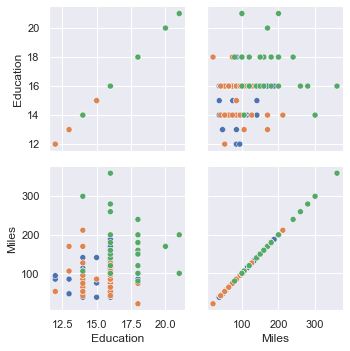

In [40]:
# Create a scatterplots using sns.scatterplot with sns.PairGrid to compare miles vs. education vs. product 

sns.set(font_scale = 1)
g = sns.PairGrid(df, vars=["Education", "Miles"], hue="Product")
g.map(sns.scatterplot)

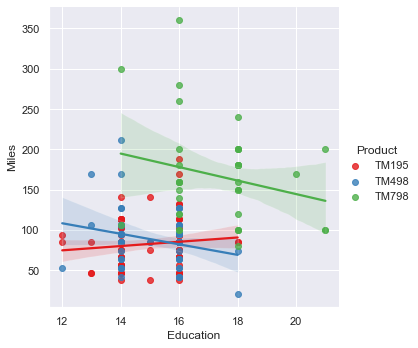

In [41]:
# Create a scatterplots by using sns.lmplot() to compare education vs. miles distribution vs. product

sns.set(font_scale = 1)
l = sns.lmplot(
    x='Education',
    y='Miles',
    data=df,
    hue='Product',  
    palette='Set1',    
)

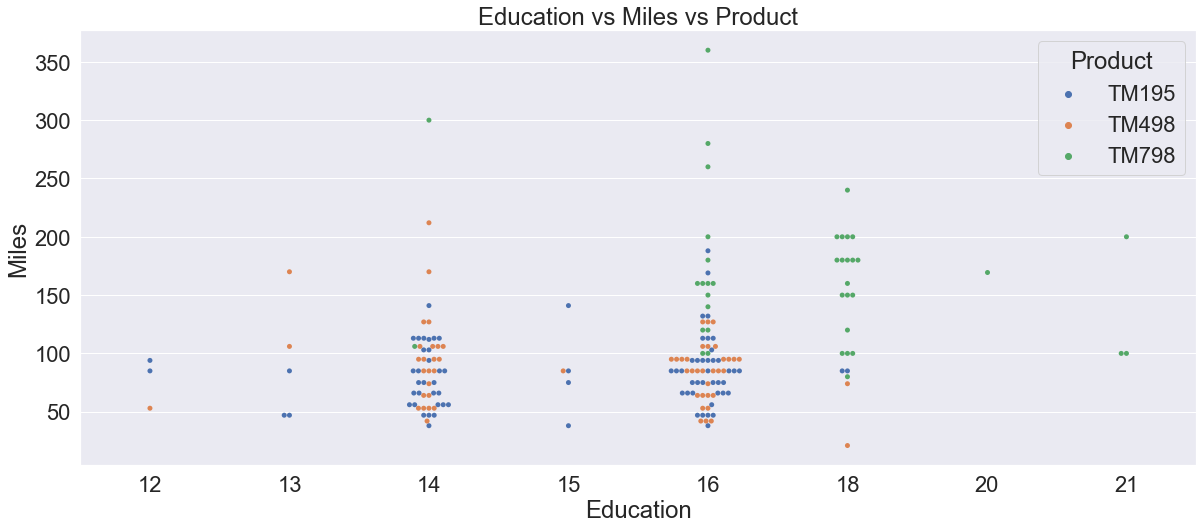

In [42]:
# Create a scatterplots by using sns.swarmplot() to compare education vs. miles distribution vs. product

sns.set(font_scale = 2)
plt.figure(figsize=(20, 8))
plt.title("Education vs Miles vs Product")
m = sns.swarmplot(
    x=df['Education'],
    y=df['Miles'],
    hue=df['Product'],
)

## Dashboards <a id="part9"></a>

### Dashboard 1: Product characterization <a id="part9.1"></a>

Text(0.5, 0.98, 'Dashboard 1: Product characterization')

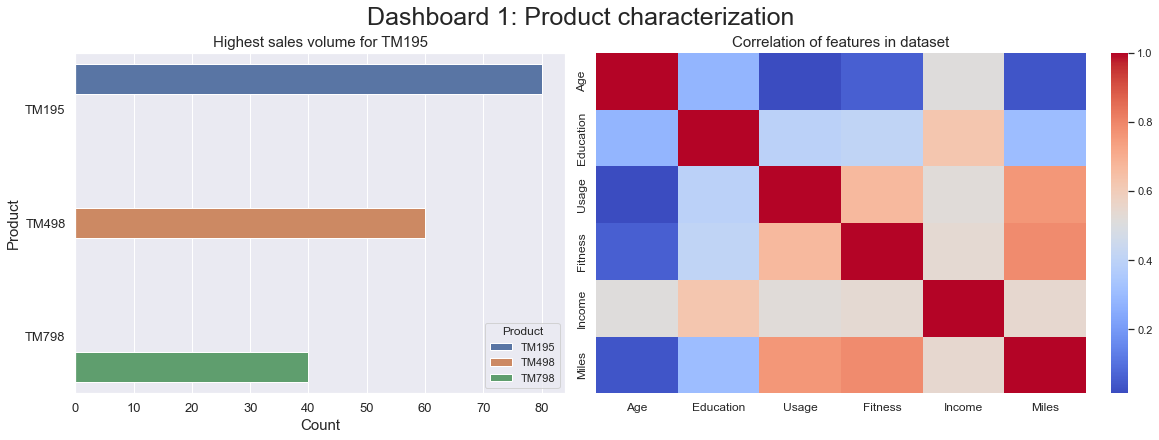

In [47]:
# Create a Dashboard of bar charts using GridSpec()

fig = plt.figure(figsize = (16,6), constrained_layout = True)
gs = GridSpec(nrows = 1, ncols= 2, figure = fig)
sns.set(font_scale = 1)

# 1st subplot for product bar chart
ax1 = fig.add_subplot(gs[0])
ax1.set_title('Highest sales volume for TM195', fontsize = 15)
ax1 = sns.countplot(y='Product', hue='Product', data=df)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Product',fontsize = 15)

# 2nd subplot for heatmap for correlation of features in dataset
ax2 = fig.add_subplot(gs[1])
ax2.set_title("Correlation of features in dataset", fontsize = 15)
ax2 = sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

fig.suptitle('Dashboard 1: Product characterization', fontsize = 25)

### Dashboard 2: Customer's demographics segmentation <a id="part9.2"></a>

Text(0.5, 0.98, "Dashboard 2: Customer's demographics segmentation")

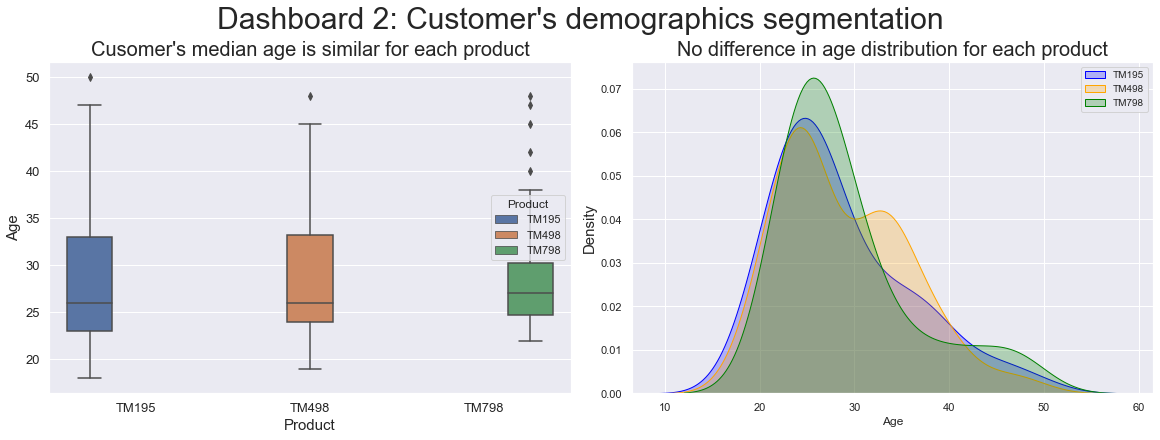

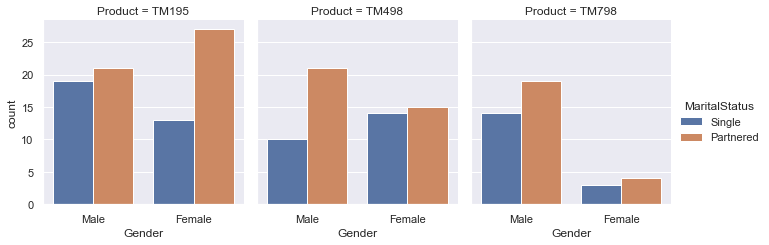

In [44]:
# Create a Dashboard of bar charts/boxplots/histogram plots using GridSpec()

fig = plt.figure(figsize=(16,6), constrained_layout=True)
gs = GridSpec(nrows=1, ncols=2, figure=fig)
sns.set(font_scale = 1)

# 1st subplot for boxplots of age distribution 
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.boxplot(y='Age', x='Product', hue='Product', data=df)
plt.title("Cusomer's median age is similar for each product", fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Product',fontsize = 15)
plt.ylabel('Age',fontsize = 15)

# 2nd subplot: income distribution for each product
a1 = df[df['Product']=='TM195'].Age
a2 = df[df['Product']=='TM498'].Age
a3 = df[df['Product']=='TM798'].Age

ax2 = plt.subplot(gs[0,1])
ax2 = sns.distplot(a1, label = 'TM195', color = 'blue', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(a2, label = 'TM498', color = 'orange', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(a3, label = 'TM798', color = 'green', hist = None, kde_kws = {'shade':True})
ax2.set_ylabel('Density',fontsize = 15)
ax2.set_xlabel('Age', fontsize = 12)
plt.title("No difference in age distribution for each product", fontsize = 20)
plt.legend(fontsize = 10)

# 3rd plot for bar charts for each product for each gender and marital status
ax3 = sns.catplot(x='Gender', hue='MaritalStatus', col='Product', data=df, kind='count', ci=None, height=4, aspect=.8)
ax3.fig.subplots_adjust(top=0.8) 


fig.suptitle("Dashboard 2: Customer's demographics segmentation", fontsize = 30)

### Dashboard 3: Customer's income and education segmentation <a id="part9.3"></a>

Text(0.5, 0.98, "Dashboard 3: Customer's income and education segmentation")

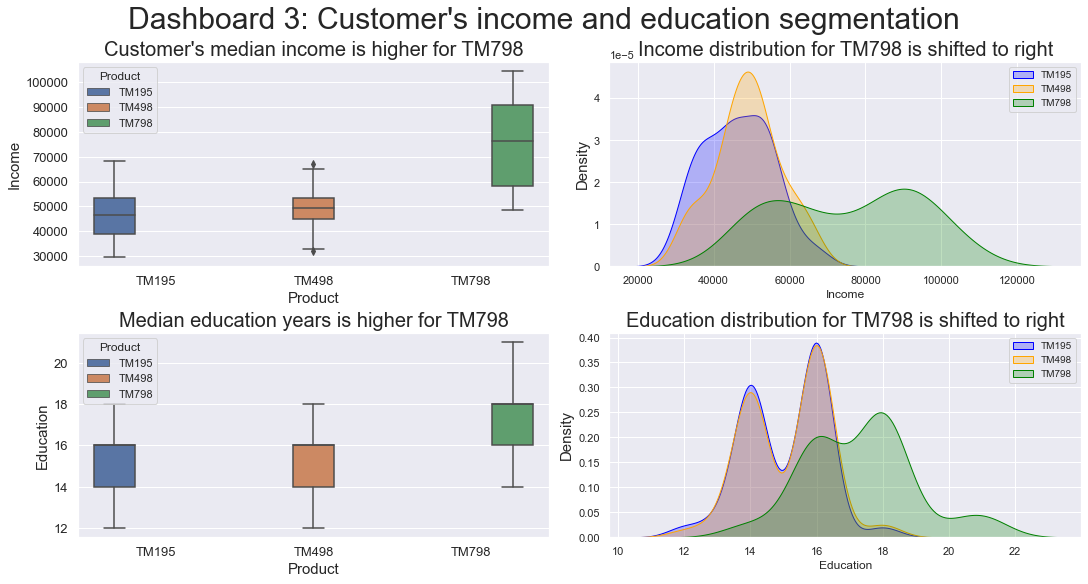

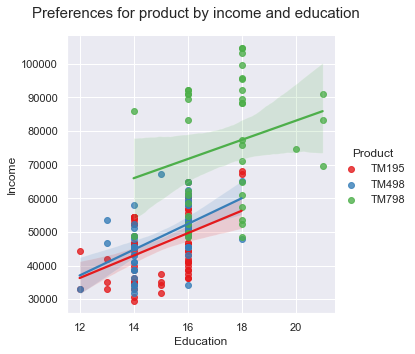

In [45]:
# Create a Dashboard of boxplots/histogram plots/scatterplots using GridSpec()

fig = plt.figure(figsize=(15,8), constrained_layout=True)
gs = GridSpec(nrows=2, ncols=2, figure=fig)
sns.set(font_scale = 1)

# 1st subplot: boxplots of income distribution 
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.boxplot(y='Income', x='Product', hue='Product', data=df)
plt.title("Customer's median income is higher for TM798", fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Product',fontsize = 15)
plt.ylabel('Income',fontsize = 15)

# 2nd subplot: income distribution for each product
i1 = df[df['Product']=='TM195'].Income
i2 = df[df['Product']=='TM498'].Income
i3 = df[df['Product']=='TM798'].Income

ax2 = plt.subplot(gs[0,1])
ax2 = sns.distplot(i1, label = 'TM195',color = 'blue', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(i2, label = 'TM498',color = 'orange', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(i3, label = 'TM798',color = 'green', hist = None, kde_kws = {'shade':True})
ax2.set_ylabel('Density',fontsize = 15)
ax2.set_xlabel('Income', fontsize = 12)
plt.title("Income distribution for TM798 is shifted to right", fontsize = 20)
plt.legend(fontsize = 10)

# 3rd subplot: boxplots of education distribution 
ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.boxplot(y='Education', x='Product', hue='Product', data=df)
plt.title("Median education years is higher for TM798", fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Product',fontsize = 15)
plt.ylabel('Education',fontsize = 15)

# 4th subplot: Education distribution for each product
e1 = df[df['Product']=='TM195'].Education
e2 = df[df['Product']=='TM498'].Education
e3 = df[df['Product']=='TM798'].Education

ax4 = plt.subplot(gs[1,1])
ax4 = sns.distplot(e1, label = 'TM195',color = 'blue', hist = None, kde_kws = {'shade':True})
ax4 = sns.distplot(e2, label = 'TM498',color = 'orange', hist = None, kde_kws = {'shade':True})
ax4 = sns.distplot(e3, label = 'TM798',color = 'green', hist = None, kde_kws = {'shade':True})
ax4.set_ylabel('Density',fontsize = 15)
ax4.set_xlabel('Education', fontsize = 12)
plt.title("Education distribution for TM798 is shifted to right", fontsize = 20)
plt.legend(fontsize = 10)

# 5th plot: scatter plots of income vs. education for each product 
ax5 = sns.lmplot(x='Education', y='Income', data=df, hue='Product', palette='Set1')
ax5.fig.suptitle("Preferences for product by income and education", fontsize = 15)
ax5.fig.subplots_adjust(top=0.9)

fig.suptitle("Dashboard 3: Customer's income and education segmentation", fontsize = 30)

### Dashboard 4: Customer's behavioural segmentation <a id="part9.4"></a>

Text(0.5, 0.98, "Dashboard 4: Customer's behavioural segmentation")

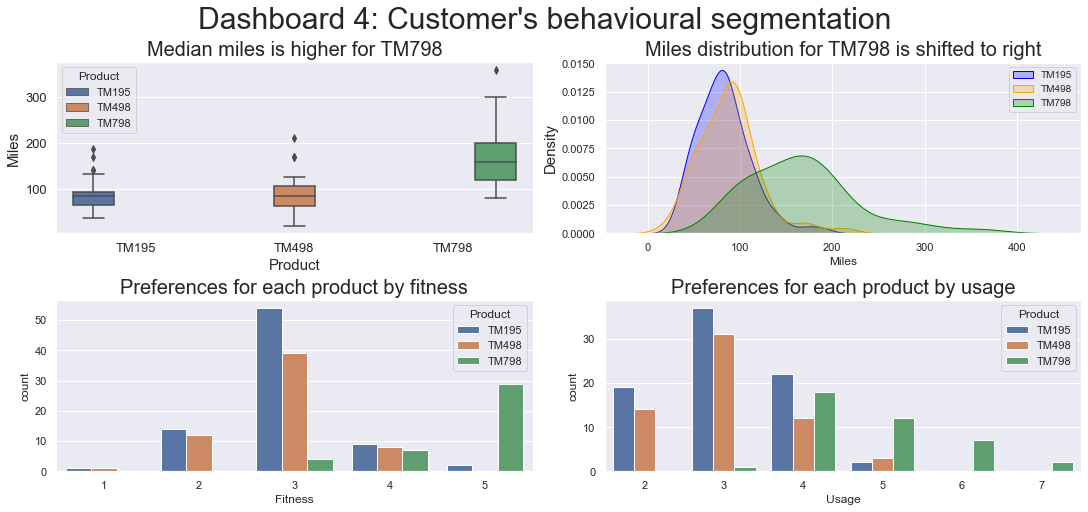

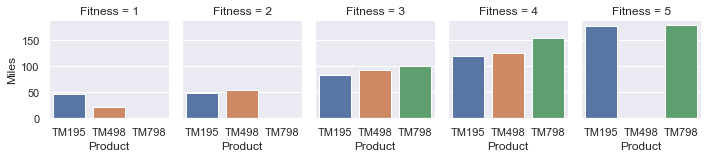

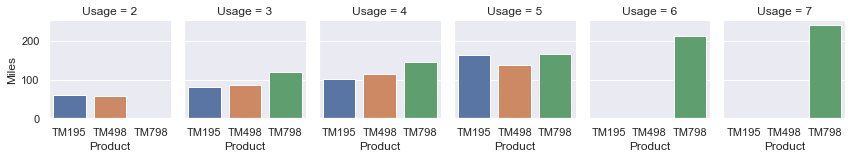

In [46]:
# Create a Dashboard of boxplots/histogram plots/bar charts using GridSpec()

fig = plt.figure(figsize=(15,7), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
sns.set(font_scale = 1)

# 1st subplot for boxplots of age distribution 
ax1 = fig.add_subplot(gs[0,0])
sns.boxplot(y='Miles', x='Product', hue='Product', data=df)
plt.title("Median miles is higher for TM798", fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Product',fontsize = 15)
plt.ylabel('Miles',fontsize = 15)

# 2nd subplot: miles distribution for each product
m1 = df[df['Product']=='TM195'].Miles
m2 = df[df['Product']=='TM498'].Miles
m3 = df[df['Product']=='TM798'].Miles

ax2 = plt.subplot(gs[0,1])
ax2 = sns.distplot(m1, label = 'TM195',color = 'blue', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(m2, label = 'TM498',color = 'orange', hist = None, kde_kws = {'shade':True})
ax2 = sns.distplot(m3, label = 'TM798',color = 'green', hist = None, kde_kws = {'shade':True})
ax2.set_ylabel('Density',fontsize = 15)
ax2.set_xlabel('Miles', fontsize = 12)
plt.title("Miles distribution for TM798 is shifted to right", fontsize = 20)
plt.legend(fontsize = 10)

# 3rd subplot: Preferences for each product by fitness
ax3 = plt.subplot(gs[1,0])
ax3 = sns.countplot(x='Fitness', hue='Product', data=df)
plt.title("Preferences for each product by fitness", fontsize = 20)

# 4th subplot: Preferences for each product by usage
ax4 = plt.subplot(gs[1,1])
ax4 = sns.countplot(x='Usage', hue='Product', data=df)
plt.title("Preferences for each product by usage", fontsize = 20)

# 5th plot: bar charts of miles vs. fitness for each product
ax5 = sns.catplot(x='Product', y='Miles', col='Fitness', data=df, kind='bar', ci=None, height=4, aspect=.5)
ax5.fig.subplots_adjust(top=0.5) 

# 6th plot: bar charts of miles vs. usage for each product
ax6 = sns.catplot(x='Product', y='Miles', col='Usage', data=df, kind='bar', ci=None, height=4, aspect=.5)
ax6.fig.subplots_adjust(top=0.5) 

fig.suptitle("Dashboard 4: Customer's behavioural segmentation", fontsize = 30)

## Conclusion (Actionable Insights) <a id="part10"></a>

### Whenever a customer shows an intent to buy a treadmill, the customer can complete a short survey to input their gender, marital status, income, education, fitness, usage and intended miles usage for the treadmill.
### If they are female customers, one can recommend TM195 or TM498 to them first, with a greater emphasis on TM195 for partnered females. Conversely, if they are male customers, one can introduce TM798 model to them first, with greater emphasis on either TM798 or TM498 for partnered males. 
### If customers have high annual income and education profile, one can recommend TM798 to them first whereas for those customers with lower annual income and education profile, TM195 or TM498 can be introduced to them instead.
### If customers intend to do intensive workouts and use it regularly, one can recommend TM798 to them first whereas for those customers who are doing less intense workouts or seldom use it, TM195 or TM498 can be introduced to them instead.

## End of Notebook